In [ ]:
import tarfile
import shutil
import os
import cv2
import pathlib
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.resnet import ResNet101

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from keras.models import load_model



random_seed = 42
keras.utils.set_random_seed(random_seed)


train_data_dir = pathlib.Path('/kaggle/input/foodx-251/clean_train80_sampling_diviso/clean_train80_sampling_diviso')
shuffle_value = True
validation_split = 0.2
batch_size = 256
seed_train_validation = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split=validation_split,
    seed=seed_train_validation,
    subset="training",
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split=validation_split,
    seed=seed_train_validation,
    subset="validation",
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value)

test_data_dir = pathlib.Path('/kaggle/input/foodx-251/val_set_diviso/val_set_diviso')
shuffle_value = True

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    subset=None,
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value)

test_degraded_data_dir = pathlib.Path('/kaggle/input/foodx-251/val_set_degraded_diviso/val_set_degraded_diviso')
shuffle_value = True
test_degraded_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_degraded_data_dir,
    labels="inferred",
    label_mode="categorical",
    subset=None,
    image_size=(224,224),
    batch_size=batch_size,
    shuffle=shuffle_value)



# Specifica il percorso del file .keras
path_to_model = '/kaggle/input/efficient/efficent_degradated_20ep_256batch_sgd_dropout.keras'

# Carica il modello
loaded_model = load_model(path_to_model)



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 75300 files belonging to 251 classes.
Using 60240 files for training.
Found 75300 files belonging to 251 classes.
Using 15060 files for validation.
Found 11993 files belonging to 251 classes.
Found 11993 files belonging to 251 classes.


In [ ]:
score_clean = loaded_model.evaluate(test_degraded_ds, batch_size=batch_size)

47/47 [==============================] - 34s 499ms/step - loss: 2.5638 - accuracy: 0.4427 - top_k_categorical_accuracy: 0.6217


8/8 [==============================] - 0s 60ms/step
True Label: 0, Predicted Label: 193


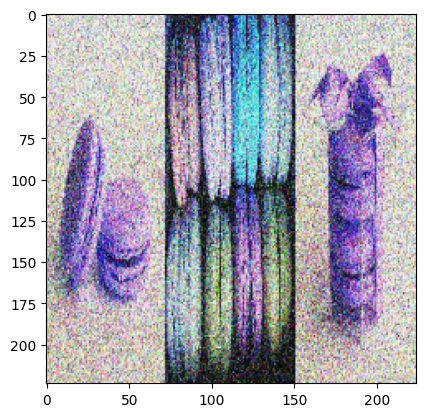

True Label: 0, Predicted Label: 193


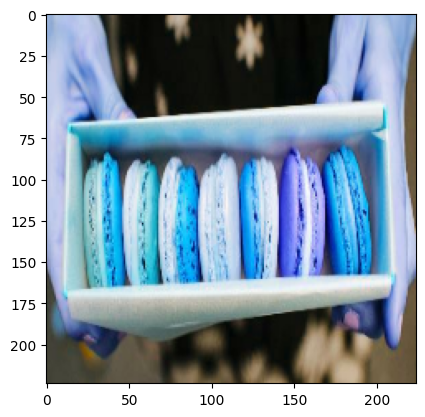

8/8 [==============================] - 0s 61ms/step
True Label: 0, Predicted Label: 193


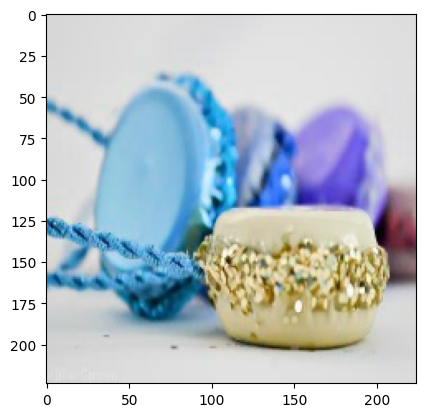

8/8 [==============================] - 0s 60ms/step
True Label: 0, Predicted Label: 5


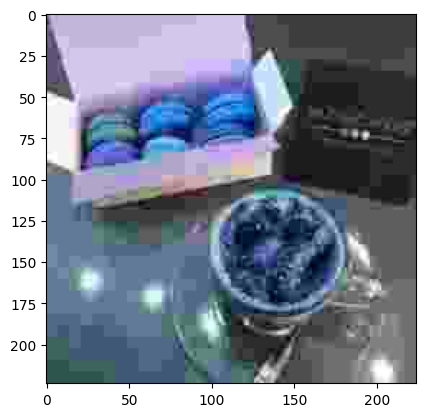

8/8 [==============================] - 0s 60ms/step
True Label: 0, Predicted Label: 37


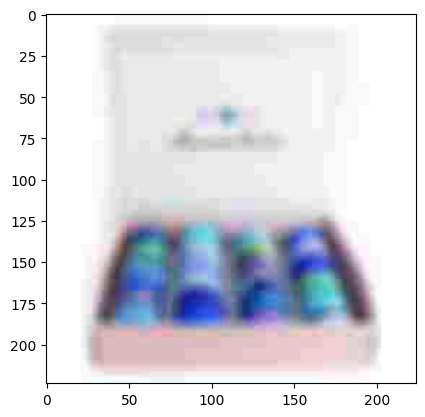

True Label: 0, Predicted Label: 161


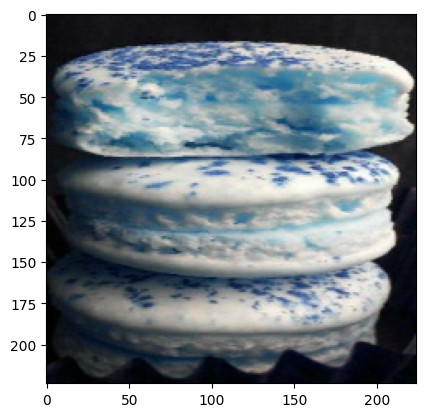

8/8 [==============================] - 0s 60ms/step
True Label: 0, Predicted Label: 199


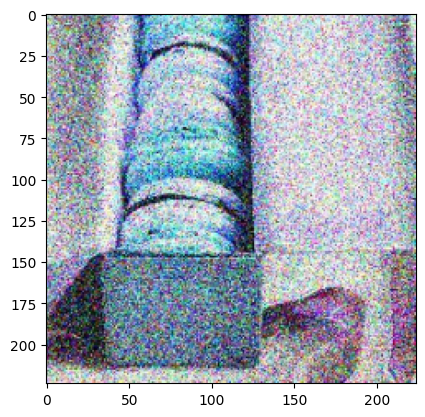

8/8 [==============================] - 0s 62ms/step
True Label: 0, Predicted Label: 101


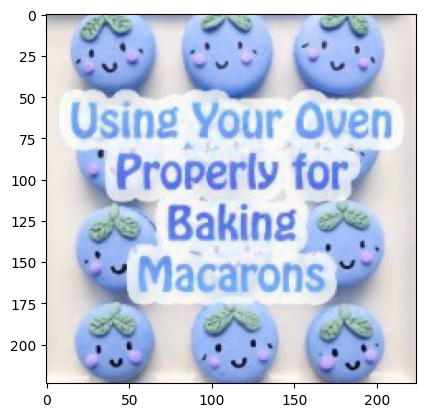

8/8 [==============================] - 1s 61ms/step
True Label: 0, Predicted Label: 68


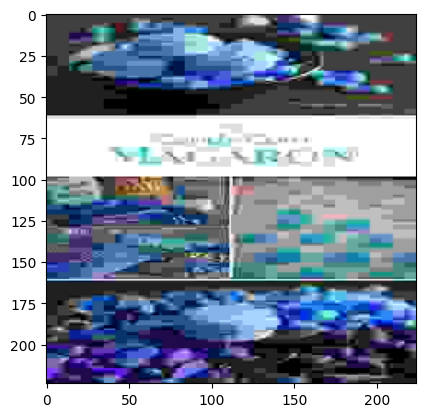

8/8 [==============================] - 0s 61ms/step
True Label: 0, Predicted Label: 10


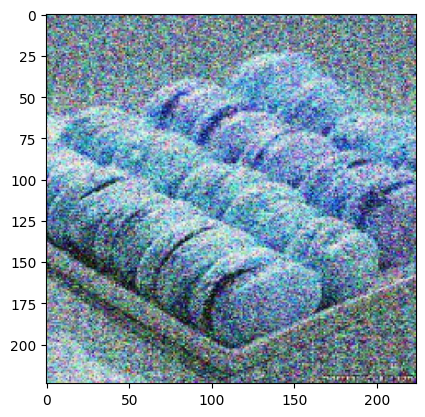

8/8 [==============================] - 0s 61ms/step
True Label: 0, Predicted Label: 189


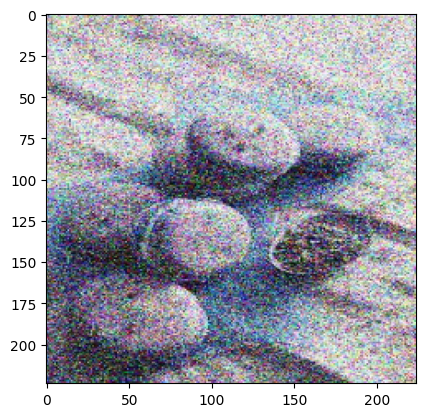

8/8 [==============================] - 0s 60ms/step
True Label: 0, Predicted Label: 131


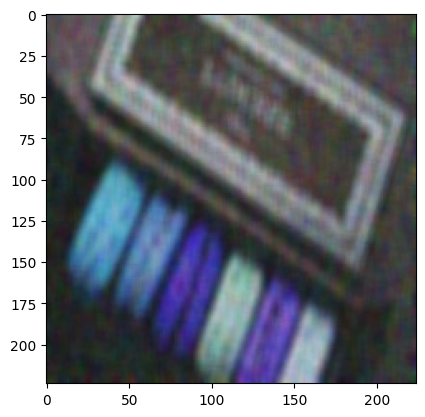

8/8 [==============================] - 0s 60ms/step
True Label: 0, Predicted Label: 84


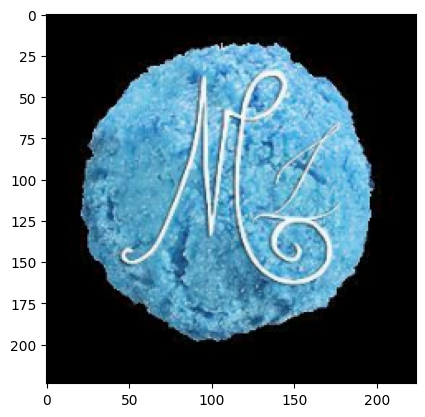

7/7 [==============================] - 3s 188ms/step
True Label: 0, Predicted Label: 225


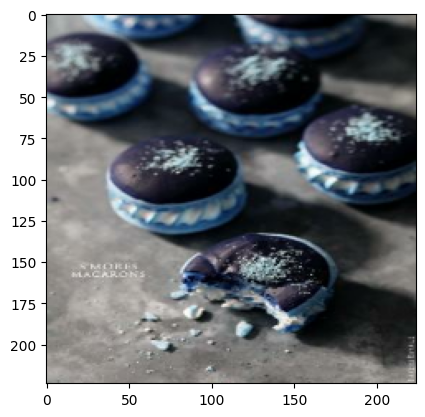

In [ ]:
def print_misclassified_images_with_true_label(dataset, class_names, target_true_label=0):
    for images, labels in dataset:
        predictions = loaded_model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(labels, axis=1)

        for i in range(len(true_labels)):
            if true_labels[i] == target_true_label and true_labels[i] != predicted_labels[i]:
                true_label_name = class_names[true_labels[i]]
                predicted_label_name = class_names[predicted_labels[i]]

                print(f"True Label: {true_label_name}, Predicted Label: {predicted_label_name}")

                image = images[i].numpy().astype(np.uint8)


                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.show()


class_names = test_degraded_ds.class_names
print_misclassified_images_with_true_label(test_degraded_ds, class_names, target_true_label=0)
